In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings


from datetime import datetime


# Ignorar todos os alertas
warnings.filterwarnings("ignore")
sns.set_palette("deep")

In [2]:
df = []

for i in [2018, 2019, 2020, 2021, 2022, 2023]:

    f = pd.read_csv(fr'data/focos_br_todos-sats_{i}.csv', sep=',')
    
    df.append(f)
    
df = pd.concat(df)

df['focos'] = df['latitude'].map(str) + "," + df['longitude'].map(str)

df['data_pas'] = pd.to_datetime(df['data_pas']).dt.date
df.set_index('data_pas', inplace=True)


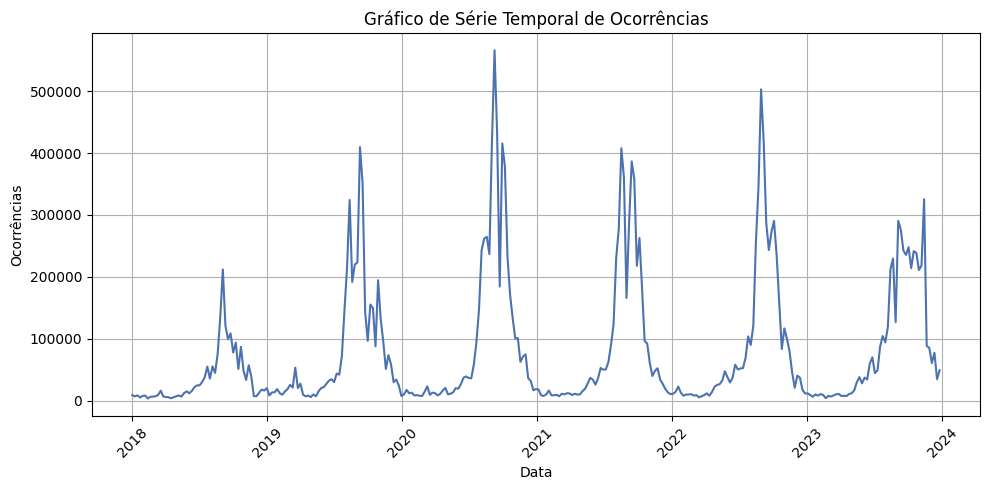

In [12]:
df['data_pas'] = df.index

df['semana'] = df['data_pas'] - pd.to_timedelta(df['data_pas'].dt.weekday, unit='d')

df['value'] = 1
dfi = pd.pivot_table(df,
               index = 'semana',
               values = 'value',
               aggfunc = len)

# Plotando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(dfi.index, dfi['value'])
plt.title('Gráfico de Série Temporal de Ocorrências')
plt.xlabel('Data')
plt.ylabel('Ocorrências')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
df.columns

Index(['latitude', 'longitude', 'satelite', 'pais', 'estado', 'municipio',
       'bioma', 'numero_dias_sem_chuva', 'precipitacao', 'risco_fogo',
       'id_area_industrial', 'frp', 'focos', 'data_pas', 'senama', 'value',
       'semana'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x1dfd987f0>,
 [Text(-1.0944890484444096, 0.10997146373151025, 'MATO GROSSO'),
  Text(-0.545928013012725, -0.9549673316967331, 'PARÁ'),
  Text(0.35801832350085844, -1.0401071483446476, 'MARANHÃO'),
  Text(0.833058476108612, -0.7183408490289254, 'AMAZONAS'),
  Text(1.058958076433325, -0.2976706105019979, 'TOCANTINS'),
  Text(0.410602267497694, 1.0204929092971455, 'OUTROS')],
 [Text(-0.5969940264242234, 0.05998443476264194, '19.0%'),
  Text(-0.29777891618875907, -0.5208912718345816, '17.6%'),
  Text(0.19528272190955911, -0.5673311718243532, '9.5%'),
  Text(0.45439553242287917, -0.3918222812885047, '7.3%'),
  Text(0.577613496236359, -0.16236578754654427, '6.6%'),
  Text(0.22396487318056035, 0.5566324959802612, '40.0%')])

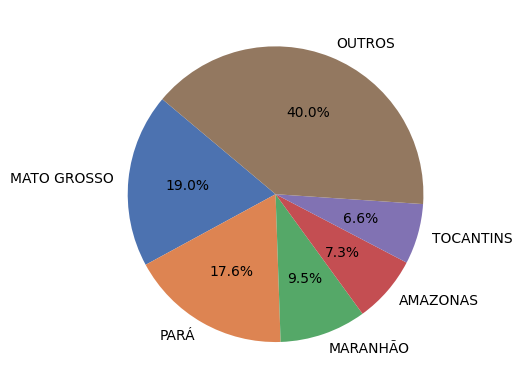

In [14]:
top5 = df['estado'].value_counts().head(5)

cinco = list(top5)

outros = df['estado'].shape[0] - sum(cinco)
cinco.append(outros)

top = list(df['estado'].value_counts().head(5).index)
top.append('OUTROS')


plt.pie(cinco, labels=top, autopct='%1.1f%%', startangle=140)

([<matplotlib.patches.Wedge at 0x1dfe063a0>,
 [Text(-0.7654105569258014, -0.7900295433378013, 'Amazônia'),
  Text(1.0839901346272052, 0.1869903420791931, 'Cerrado'),
  Text(0.17755003208293085, 1.0855763382219374, 'Caatinga'),
  Text(-0.2997698156748505, 1.0583657485058113, 'Pantanal'),
  Text(-0.6824631523914467, 0.8626958013274026, 'Mata Atlântica'),
  Text(-0.8347421452978506, 0.7163836617787582, 'OUTROS')],
 [Text(-0.41749666741407343, -0.4309252054569825, '47.7%'),
  Text(0.5912673461602936, 0.10199473204319623, '32.2%'),
  Text(0.09684547204523501, 0.5921325481210568, '7.2%'),
  Text(-0.16351080854991842, 0.5772904082758971, '6.8%'),
  Text(-0.3722526285771527, 0.4705613461785832, '5.8%'),
  Text(-0.4553138974351912, 0.3907547246065953, '0.4%')])

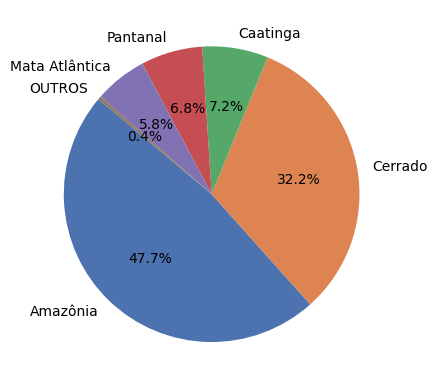

In [15]:
top5 = df['bioma'].value_counts().head(5)

cinco = list(top5)

outros = df['bioma'].shape[0] - sum(cinco)
cinco.append(outros)

top = list(df['bioma'].value_counts().head(5).index)
top.append('OUTROS')


plt.pie(cinco, labels=top, autopct='%1.1f%%', startangle=140)

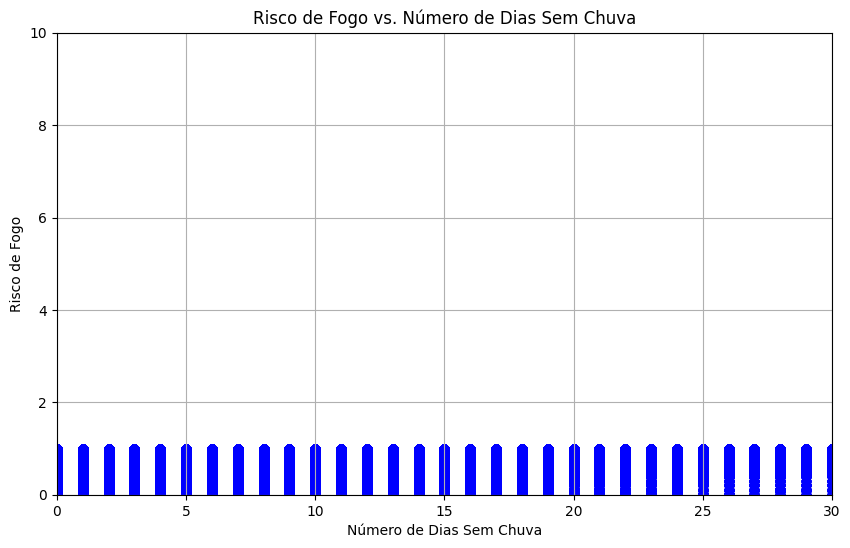

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Exemplo de dados


# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['numero_dias_sem_chuva'], df['risco_fogo'], alpha=0.5, color='b')
plt.title('Risco de Fogo vs. Número de Dias Sem Chuva')
plt.xlabel('Número de Dias Sem Chuva')
plt.ylabel('Risco de Fogo')
plt.grid(True)
plt.xlim(0, 30)  # Limitar eixo x de 0 a 30
plt.ylim(0, 10)  # Limitar eixo y de 0 a 10
plt.show()

Text(0.5, 1.0, 'Número de Dias Sem Chuva vs risco fogo')

<Figure size 1000x600 with 0 Axes>

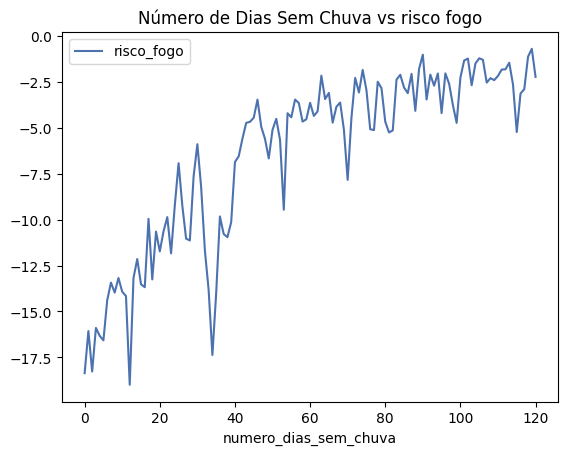

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Exemplo de dados
plt.figure(figsize=(10, 6))

pd.pivot_table(df[df['numero_dias_sem_chuva']>=0],
               index = 'numero_dias_sem_chuva',
               values= 'risco_fogo',
               aggfunc = np.mean).plot()

# Criar o gráfico de dispersão
# plt.scatter(df['numero_dias_sem_chuva'], df['risco_fogo'], alpha=0.5, color='b')
plt.title('Número de Dias Sem Chuva vs risco fogo')


# plt.xlabel('Número de Dias Sem Chuva')
# plt.ylabel('Risco de Fogo')
# plt.grid(True)
# plt.xlim(0, 30)  # Limitar eixo x de 0 a 30
# plt.ylim(0, 10)  # Limitar eixo y de 0 a 10
# plt.show()

Text(0.5, 1.0, 'Número de Dias Sem Chuva vs risco fogo')

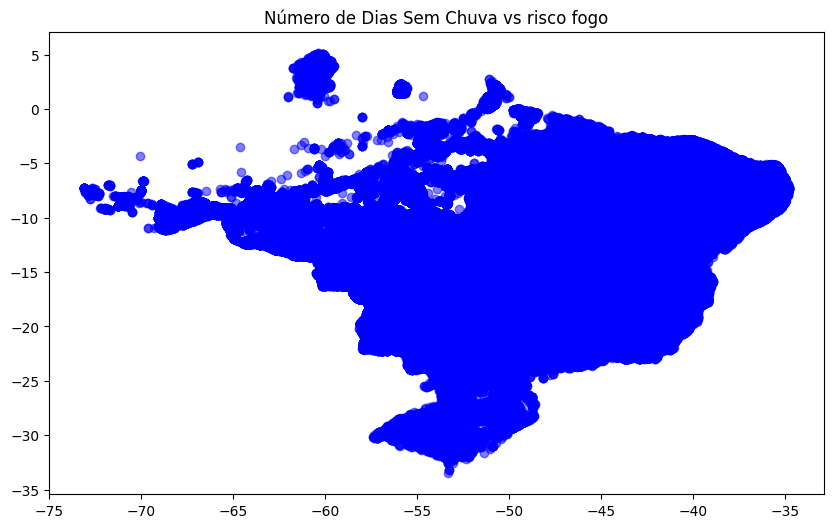

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Exemplo de dados
plt.figure(figsize=(10, 6))



p = pd.pivot_table(df,
               index = 'precipitacao',
               values= 'risco_fogo',
               aggfunc = np.mean)

dfi = df[df['risco_fogo']>0.9]

# Criar o gráfico de dispersão
plt.scatter(dfi['longitude'], dfi['latitude'], alpha=0.5, color='b')
plt.title('Número de Dias Sem Chuva vs risco fogo')


# plt.xlabel('Número de Dias Sem Chuva')
# plt.ylabel('Risco de Fogo')
# plt.grid(True)
# plt.xlim(0, 30)  # Limitar eixo x de 0 a 30
# plt.ylim(0, 10)  # Limitar eixo y de 0 a 10
# plt.show()

<Axes: >

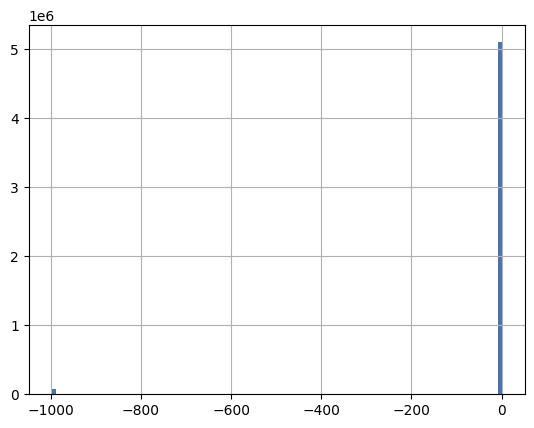

In [61]:
df['risco_fogo'].hist(bins = 100)

In [56]:
df

,latitude,longitude,data_pas,satelite,pais,estado,municipio,bioma,numero_dias_sem_chuva,precipitacao,risco_fogo,id_area_industrial,frp
0,-17.74963,-42.89283,2020-01-01 04:18:00,NPP-375D,Brasil,MINAS GERAIS,ITAMARANDIBA,Cerrado,5.0,8.0,0.1,0,2.5
1,-19.48211,-42.53120,2020-01-06 04:24:00,NPP-375D,Brasil,MINAS GERAIS,IPATINGA,Mata Atlântica,0.0,0.8,-999.0,220,1.6
2,-17.73322,-57.29283,2020-01-06 04:24:00,NPP-375D,Brasil,MATO GROSSO,POCONÉ,Pantanal,3.0,7.5,0.1,0,4.1
3,-17.73439,-57.28699,2020-01-06 04:24:00,NPP-375D,Brasil,MATO GROSSO,POCONÉ,Pantanal,3.0,7.3,0.1,0,2.8
4,-17.73462,-57.31151,2020-01-06 04:24:00,NPP-375D,Brasil,MATO GROSSO,POCONÉ,Pantanal,4.0,8.0,0.2,0,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212985,-17.73982,-57.55719,2020-10-30 17:57:38,NOAA-20,Brasil,MATO GROSSO,POCONÉ,Pantanal,NaN,NaN,NaN,0,NaN
5212986,-17.69369,-57.65010,2020-10-30 17:57:38,NOAA-20,Brasil,MATO GROSSO,POCONÉ,Pantanal,NaN,NaN,NaN,0,NaN
5212987,-16.61952,-57.23793,2020-10-30 17:57:38,NOAA-20,Brasil,MATO GROSSO,POCONÉ,Pantanal,NaN,NaN,NaN,0,NaN
5212988,-17.49643,-57.37136,2020-10-30 17:57:38,NOAA-20,Brasil,MATO GROSSO,POCONÉ,Pantanal,NaN,NaN,NaN,0,NaN


In [3]:

import pandas as pd

# Criação de um DataFrame exemplo com a coluna "data"
data = {
    'data': ['2023-10-01', '2023-10-03', '2023-10-05', '2023-10-08', '2023-10-20']
}
df = pd.DataFrame(data)

# Convertendo a coluna "data" para datetime
df['data'] = pd.to_datetime(df['data'])

# Calculando o primeiro dia da semana (considerando que a semana começa na segunda-feira)
# Você pode mudar 'W-MON' para 'W-SUN' se quiser que a semana comece no domingo
df['senama'] = df['data'] - pd.to_timedelta(df['data'].dt.weekday, unit='d')

# Exibindo o DataFrame resultante
print(df)


        data     senama
0 2023-10-01 2023-09-25
1 2023-10-03 2023-10-02
2 2023-10-05 2023-10-02
3 2023-10-08 2023-10-02
4 2023-10-20 2023-10-16


In [4]:
df['data']

0   2023-10-01
1   2023-10-03
2   2023-10-05
3   2023-10-08
4   2023-10-20
Name: data, dtype: datetime64[ns]